# ¿Podemos determinar si una persona puede sufrir un ataque cardíaco en función de una serie de variables?

In [122]:
#Importaciones
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Introducción

**Contexto empresarial**: Según la OMS las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo. Los últimos datos arrojan que en 2015 fallecieron 17,7 millones de personas, un 31% de todas las muertes mundiales dicho año. Se requiere establecer si es posible determinar las probabilidades de sufrir un ataque cardíaco. Esto podría ser útil para sectores como el de los seguros médicos o servicios públicos de salud.

**Problema comercial**: La tarea será, mediante datos, realizar visualizaciones para responder a las preguntas que se establecen.

**Contexto analítico**: En el dataset elegido aparece un grupo de 5110 personas, algunas de las cuales han sufrido algún evento cardiovascular, como puede ser un infarto o una angina de pecho (no se aclara cual ni si ha fallecido después de dicho evento).

El objetivo de este análisis se trata de establecer diferentes preguntas que puedan llevar a encontrar algún punto en común que ayude a determinar si existe alguna forma de calcular las probabilidades de que alguien sufra algún evento que denominaremos "ataque cardíaco" con una serie de valores relevantes, tanto sociales (trabajo, entorno, edad, etc) como de salud (glucosa, hipertensión, fumador, etc). 

Estableceremos las siguientes preguntas:

- ¿Cuántos pacientes han tenido un ataque cardíaco?
- ¿Hay una diferencia significativa en la incidencia de ataques cardíacos entre hombres y mujeres?
- ¿Hay una relación entre la edad y la incidencia de ataques cardíacos?
- ¿Qué masa corporal tienen los pacientes?
- ¿Hay alguna relación entre la masa corporal, la glucosa y la posibilidad del ataque cardíaco?


## Lectura dataset "healthcare-dataset-stroke-data.csv"

In [123]:
#Leemos dataset descargado desde aquí: https://gist.github.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04#file-healthcare-dataset-stroke-data-csv
df_stroke = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df_stroke['age']=df_stroke['age'].round(0).astype(int)



#Reemplazamos nulos
df_stroke.fillna(df_stroke.mean(),inplace=True)
df_stroke.isnull().values.any()
df_stroke.isnull().sum

display(df_stroke)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


El data set elegido nos provee de los siguientes campos:

- id: Número identificativo del paciente
- gender: Género. Puede ser Masculino, femenino o "otro".
- age: Edad
- hypertension: 1 indica que padece hipertensión, 0 que no.
- heart_disease: 1 indica que tiene alguna afección cardíaca, 0 que no.
- ever_married: Indica si ha estado o no casado alguna vez
- work_type: Tipo de trabajo. Puede ser Private (compañía privada), Self-employed (autónomo), Never Worked (nunca ha trabajado) o Children (niños sin edad para trabajar.)
- Residence_type: Tipo de residencia. Puede ser urbana o rural.
- avg_glucose_level: Media del nivel de glucosa.
- bmi: Índice de masa corporal
- smoking_status: Fumador. Puede ser smokes (fumador), formerly smoker (fumador previo no actualmente), never smoked (nunca ha fumado) o Unknown (desconocido)
- stroke: Valor target. Indica si el paciente ha tenido o no algún ataque cardíaco.

# Pacientes que han padecido un ataque cardíaco

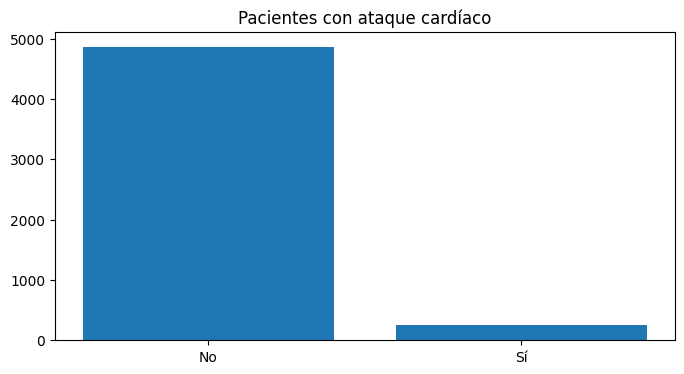

0    4861
1     249
Name: stroke, dtype: int64


In [124]:
# Pacientes que han padecido un ataque vs pacientes que no.
data = df_stroke['stroke'].value_counts()
cols = ['No','Sí']
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('Pacientes con ataque cardíaco')
ax.bar(cols, data)
plt.show()
print(data)

En la gráfica y el dato posterior se observa que un 4,87% de los pacientes ha padecido un ataque cardíaco. El total de la muestra es de 5110 pacientes.

# Relación de pacientes por género en el dataset

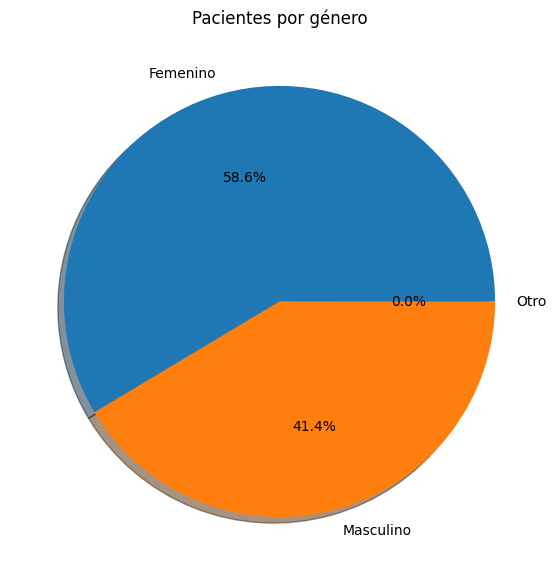

In [125]:
# Relación de pacientes por género en el dataset

data = df_stroke['gender'].value_counts()
fig,ax = plt.subplots(figsize =(10, 7))
ax.set_title('Pacientes por género')
ax.pie(data, labels = ['Femenino','Masculino','Otro'],autopct='%1.1f%%',
        shadow=True);


Del muestreo de 5110 pacientes, 58,6% (2994) se identifican como mujeres, 41,4% (2115) como hombres y hay un % muy marginal de 1 persona que no se identifica con ninguno de esos dos géneros (otro).

# Pacientes por género indicando con ataque cardíaco

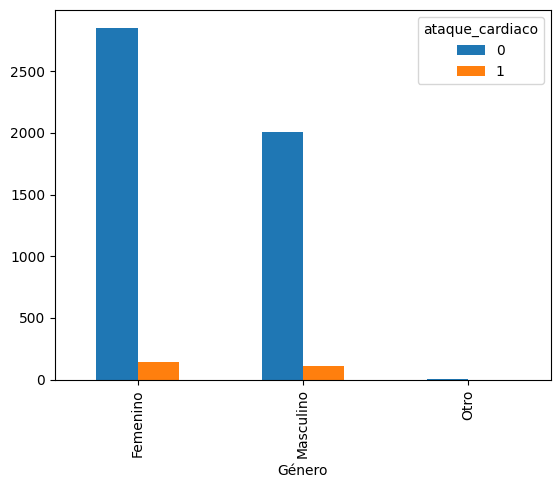

In [126]:
# Pacientes por género indicando los cuales han padecido o no un ataque cardíaco
df_by_gender = df_stroke.copy()

df_by_gender.rename(columns={'gender':'Género'}, inplace = True)
df_by_gender['Género'] = df_by_gender['Género'].replace('Female','Femenino')
df_by_gender['Género'] = df_by_gender['Género'].replace('Male','Masculino')
df_by_gender['Género'] = df_by_gender['Género'].replace('Other','Otro')

df_by_gender.rename(columns={'stroke':'ataque_cardiaco'}, inplace = True)
data = pd.crosstab(df_by_gender['Género'],df_by_gender['ataque_cardiaco'])
data.plot.bar();

Indagamos un poco más en cuanto al número de personas con ataque cardíaco pero filtrando por género. Observamos a 141 mujeres con ataques cardíacos sobre las 2994 indicadas anteriormente (4,7%), mientras que en el género masculino hay 108 sobre los 2115 (5,10%). Esto hace indicar, aparentemente, que puede haber una propensión, por algún factor a analizar, sobre los hombres a padecer ataques cardíacos.

# Distribución de la masa corporal a nivel de todos los pacientes

Text(0.5, 0, 'Distribución del índice de masa corporal para todos los pacientes')

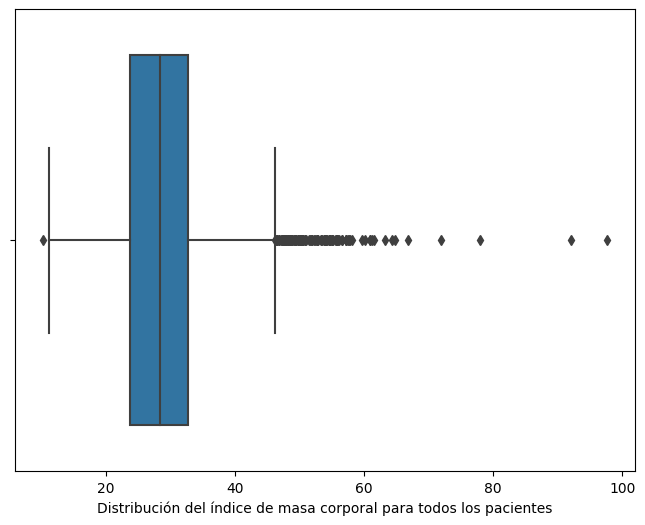

In [127]:
# Distribución de la masa corporal a nivel de todos los pacientes

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(data=df_stroke,x="bmi");
ax.set_xlabel('Distribución del índice de masa corporal para todos los pacientes')

Vamos a observar los rangos de masa corporal de los pacientes. La mayoría de ellos está entre 20 y 40. Hay que gener en cuenta de que lo reconocido por la OMS como "Normal" va de los 18,5 a 24,9 y de 25 a 29,9 sobrepeso. A partir de ahí nos vamos a distintos grados de obesidad. Nuestro muestreo parece estar en su grueso entre "normal" y sobrepeso, habiendo valores demasiado elevados que, si bien podría ser un dato erróneo, no tenemos manera de saberlo.

# Personas por rango de edad

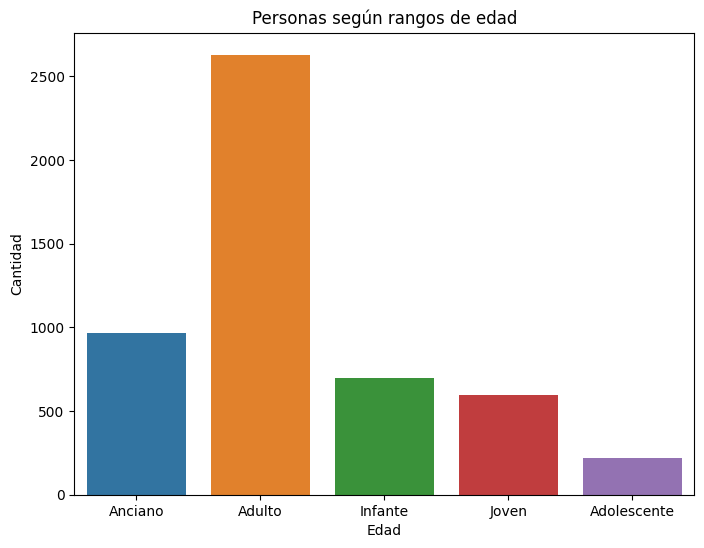

In [128]:
# Personas por rango de edad

df_ages=df_stroke.copy()
conditions = [
    (df_ages['age'] <= 14),
    (df_ages['age'] > 14) & (df_ages['age'] <= 18),
    (df_ages['age'] > 18) & (df_ages['age'] <= 29),
    (df_ages['age'] > 29) & (df_ages['age'] <= 65),
    (df_ages['age'] > 65)
    ]

values = ['Infante', 'Adolescente', 'Joven', 'Adulto','Anciano']

df_ages['agerange'] = np.select(conditions, values)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df_ages['agerange'], data=df_ages)
ax.set_title('Personas según rangos de edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad');


Ahora, revisemos los rangos de edad. Se ha hecho este baremo:
14 años o menos, infante.
Mayor de 14 a 18, adolescente.
19 a 29, joven.
30 a 65, adulto.
Mayor de 65, anciano.

La mayor parte de nuestra muestra pertenece a lo que consideraremos adulto.

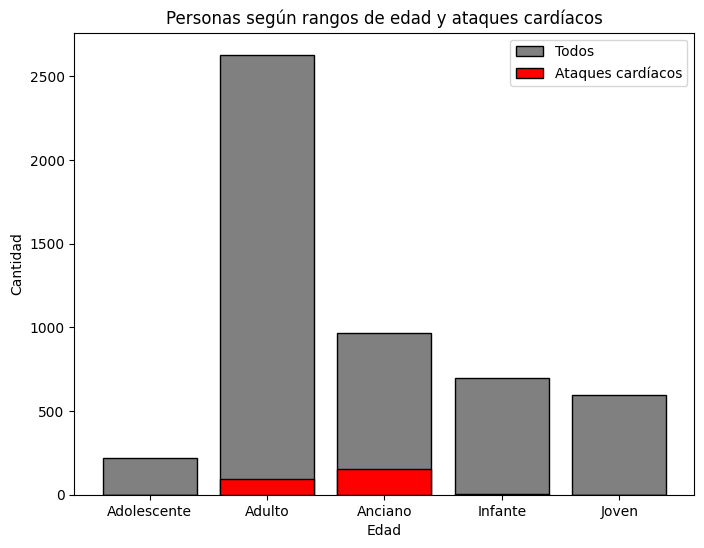

In [129]:
df_ages_grouped = df_ages.groupby('agerange').agg({'id':'count', 'stroke':'sum'})
df_ages_grouped['percent'] = df_ages_grouped['stroke'] / df_ages_grouped['id'] * 100

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(df_ages_grouped.index, df_ages_grouped['id'], color='gray', edgecolor='black')
ax.bar(df_ages_grouped.index, df_ages_grouped['stroke'], color='red', edgecolor='black')

ax.set_title('Personas según rangos de edad y ataques cardíacos')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad')
ax.legend(['Todos', 'Ataques cardíacos'])


El gráfico muestra la cantidad de personas por cada rango de edad. Se puede ver que la mayoría de las personas en el rango de anciano, es decir, mayores de 65 años, tienen un mayor número de ataques cardíacos. Este hecho sugiere que la edad es un factor importante en el desarrollo de enfermedades cardíacas

# Distribución de la masa corporal de todos los pacientes a nivel de edad y género

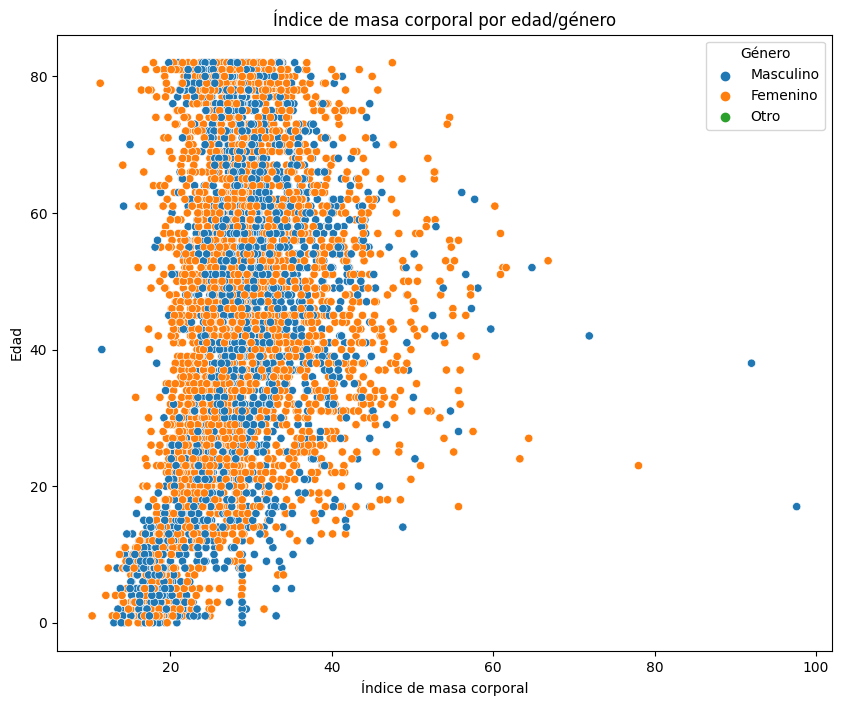

In [130]:
# Distribución de la masa corporal de todos los pacientes a nivel de edad y género

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=df_by_gender,x='bmi',y='age',hue='Género');

ax.set_title('Índice de masa corporal por edad/género')
ax.set_xlabel('Índice de masa corporal')
ax.set_ylabel('Edad');

Esta gráfica confirma que las anomalías de índices de masa corporal son casos muy aislados. No obstante se aprecia una tendencia, si bien no se observa aparentemente mucho en cuanto a los géneros, se ve una pequeña curva de la masa corporal en función de la edad. A más joven, la masa corporal es más baja, subiendo, muy paulatinamente, hasta que a partir de los 60 años parece que vuelve a disminuir.

# Relación entre glucosa y masa corporal por edad

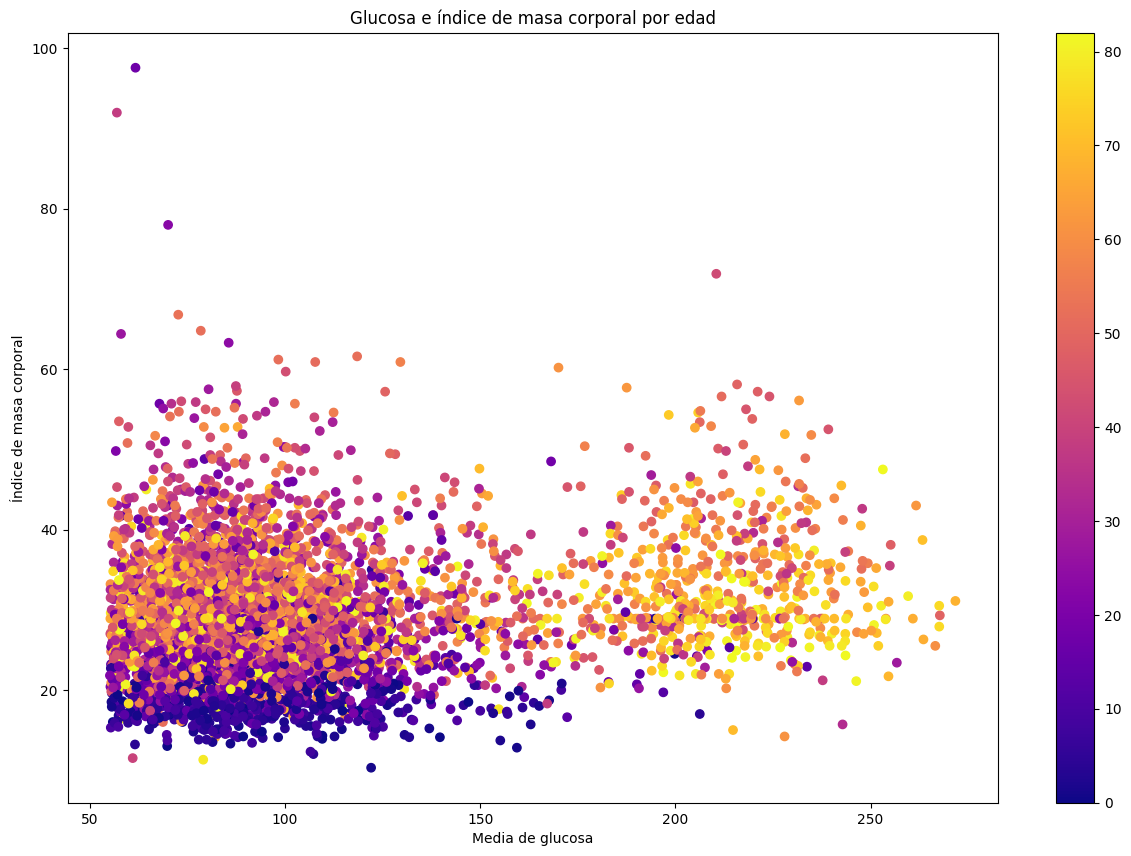

In [131]:
#Relación entre glucosa y masa corporal por edad

df_glc_bmi=df_stroke.copy()
df_glc_bmi.set_index('age',inplace=True)

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_title('Glucosa e índice de masa corporal por edad')
ax.set_xlabel('Media de glucosa')
ax.set_ylabel('Índice de masa corporal')

mapeo_colores=ax.scatter(df_glc_bmi['avg_glucose_level'], df_glc_bmi['bmi'], c=df_glc_bmi.index, cmap='plasma')
fig.colorbar(mapeo_colores);

Ahora, sin tener en cuenta el género, añadimos la glucosa a la ecuación.
Se observa que aunque parece que la mayoría de las personas tienen una glucosa menor de 150, un segmento bastante amplio, especialmente de personas con edad mayor de 50, pasan de los 200.

# Relación entre glucosa y masa corporal padeciendo ataque cardíaco

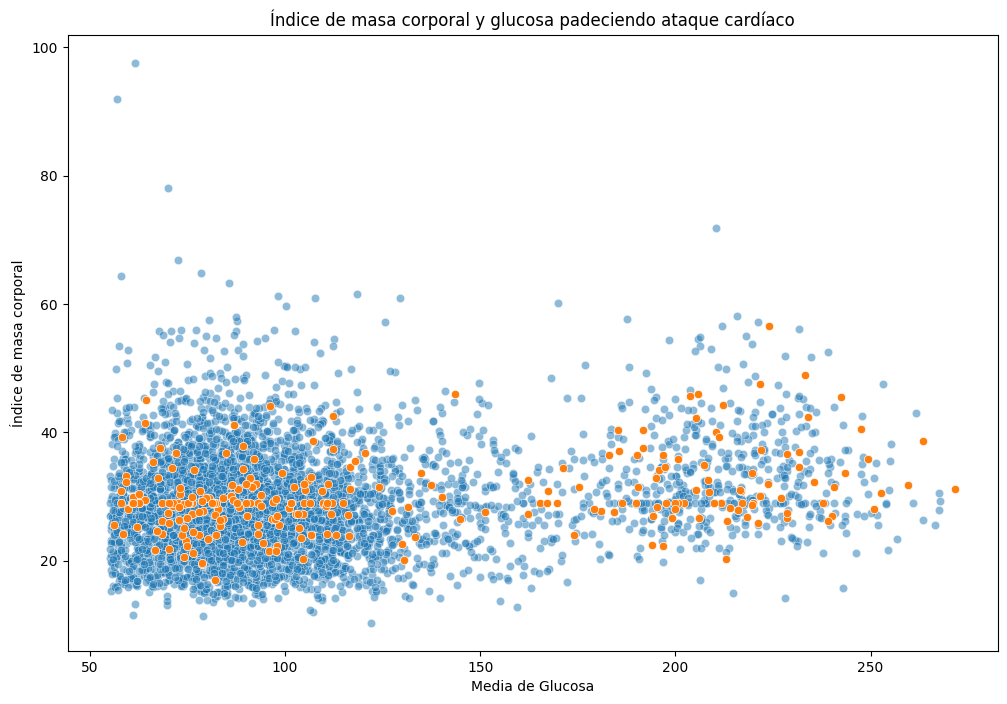

In [132]:
df_bmi_stroke = df_stroke.copy()
df_bmi_stroke.rename(columns={'stroke':'ataque_cardiaco'}, inplace = True)
df_bmi_stroke["alpha"]=np.where(df_bmi_stroke.ataque_cardiaco == 1, 1.0, 0.5)

fig, ax = plt.subplots(figsize=(12,8))

ax = sns.scatterplot(y='bmi', x ='avg_glucose_level', data=df_bmi_stroke[df_bmi_stroke.alpha == 0.5],alpha=0.5)
sns.scatterplot(y='bmi', x ='avg_glucose_level', data=df_bmi_stroke[df_bmi_stroke.alpha == 1],alpha=1)

ax.set_title('Índice de masa corporal y glucosa padeciendo ataque cardíaco')
ax.set_xlabel('Media de Glucosa')
ax.set_ylabel('Índice de masa corporal');

En esta gráfica observamos que parece que a partir de 30 (obesidad) están la mayor parte de los casos.
Pero, no obstante, sí que podemos ver algo más con la media de glucosa y es que se aprecian más casos cuando los valores son más elevados. Sin duda arroja algo de luz esto, dado que parece que la combinación de masa corporal mayor de 30 y la glucosa elevada hacen a estos pacientes más propensos a padecer ataques cardíacos.

## Conclusiones del EDA

En nuestro análisis exploratorio de datos (EDA), podemos concluir que existe una probabilidad significativa de padecer un ataque cardíaco en pacientes con una masa corporal elevada, cercana a la obesidad, y con niveles medios de glucosa más altos. Aunque este análisis es solo una pequeña muestra de los datos disponibles, nos brinda una visión general de los factores que podrían estar contribuyendo a los ataques cardíacos.

Es importante tener en cuenta que muchos otros factores podrían estar influyendo en la probabilidad de sufrir un ataque cardíaco, como por ejemplo, si el paciente padece alguna afección cardíaca previa, si es fumador, su estado de salud general, entre otros. Además, a nivel social, es necesario explorar factores como el tipo de residencia o el tipo de trabajo para obtener una visión más completa de la situación.

En conclusión, aunque nuestro análisis es solo un punto de partida, nos brinda una idea clara de los factores que debemos profundizar en futuras investigaciones para entender mejor las causas de los ataques cardíacos y cómo prevenirlos.

# Modelado

## Preparamos dataset

In [133]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

df_stroke = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df_stroke['age']=df_stroke['age'].round(0).astype(int)



#Reemplazamos nulos
df_stroke.fillna(df_stroke.mean(),inplace=True);
df_stroke.isnull().values.any();
df_stroke.isnull().sum;



Creamos nuevas variables

In [134]:
# Comorbilidades (más de una condición médica)
df_stroke['comorbidities'] = df_stroke[['hypertension', 'heart_disease']].sum(axis=1)

# Grupos de edades:
df_stroke['age_group'] = pd.cut(df_stroke['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Niveles de actividades en función de la profesión y la residencia
conditions = [    (df_stroke['work_type'] == 'Never_worked') | (df_stroke['work_type'] == 'children'),
    (df_stroke['work_type'] == 'Self-employed') & (df_stroke['Residence_type'] == 'Rural'),
    (df_stroke['work_type'] == 'Self-employed') & (df_stroke['Residence_type'] == 'Urban'),
    (df_stroke['work_type'] == 'Private') & (df_stroke['Residence_type'] == 'Rural'),
    (df_stroke['work_type'] == 'Private') & (df_stroke['Residence_type'] == 'Urban'),
    (df_stroke['work_type'] == 'Govt_job') & (df_stroke['Residence_type'] == 'Rural'),
    (df_stroke['work_type'] == 'Govt_job') & (df_stroke['Residence_type'] == 'Urban')
]

values = [1, 2, 3, 2, 3, 2, 3]

df_stroke['activity_level_residence'] = np.select(conditions, values)

df_stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,60-70,3
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,60-70,2
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,70-80,2
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,40-50,3
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,70-80,2


La idea de esto es crear 3 nuevas variables, comorbidades, que indica más de una condición médica, grupos de edades y niveles de actividad en función de la profesión y la residencia

##### Comprobamos tipos de datos de cada columna

In [135]:
# Comprobamos tipos de datos
cats = list(df_stroke.select_dtypes(include=['object','bool']) )
nums = list(df_stroke.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'comorbidities']


### Usamos todos los valores del dataset y los normalizamos y numerizamos

In [136]:
# Clasificamos datos para el encoding
encoder = []
onehot = []

for col in cats:
   if len(df_stroke[col].unique()) == 2:
        encoder.append(col)
   else:
        onehot.append(col)

print(encoder)
print(onehot)

['ever_married', 'Residence_type']
['gender', 'work_type', 'smoking_status']


In [137]:
df_labencoded = df_stroke.copy()

for col in encoder:
    df_labencoded[col] = df_labencoded[col].astype('category').cat.codes
df_labencoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,9046,Male,67,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,1,60-70,3
1,51676,Female,61,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,0,60-70,2
2,31112,Male,80,0,1,1,Private,0,105.92,32.500000,never smoked,1,1,70-80,2
3,60182,Female,49,0,0,1,Private,1,171.23,34.400000,smokes,1,0,40-50,3
4,1665,Female,79,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,1,70-80,2


In [138]:
# Comprobamos la correlación de las features con el target
df_labencoded.corr().round(2)

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,comorbidities,activity_level_residence
id,1.00,0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,0.01,0.00,0.01
age,0.00,1.00,0.28,0.26,0.68,0.01,0.24,0.33,0.25,0.36,0.49
hypertension,0.00,0.28,1.00,0.11,0.16,-0.01,0.17,0.16,0.13,0.82,0.09
heart_disease,-0.00,0.26,0.11,1.00,0.11,0.00,0.16,0.04,0.13,0.66,0.07
ever_married,0.01,0.68,0.16,0.11,1.00,0.01,0.16,0.34,0.11,0.19,0.42
Residence_type,-0.00,0.01,-0.01,0.00,0.01,1.00,-0.00,-0.00,0.02,-0.00,0.62
avg_glucose_level,0.00,0.24,0.17,0.16,0.16,-0.00,1.00,0.17,0.13,0.23,0.08
bmi,0.00,0.33,0.16,0.04,0.34,-0.00,0.17,1.00,0.04,0.14,0.33
stroke,0.01,0.25,0.13,0.13,0.11,0.02,0.13,0.04,1.00,0.17,0.08
comorbidities,0.00,0.36,0.82,0.66,0.19,-0.00,0.23,0.14,0.17,1.00,0.11


In [139]:
df = df_stroke.drop(['id'], axis=1)
nums.remove('id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,60-70,3
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,60-70,2
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,70-80,2
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,40-50,3
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,70-80,2


Borramos outliers

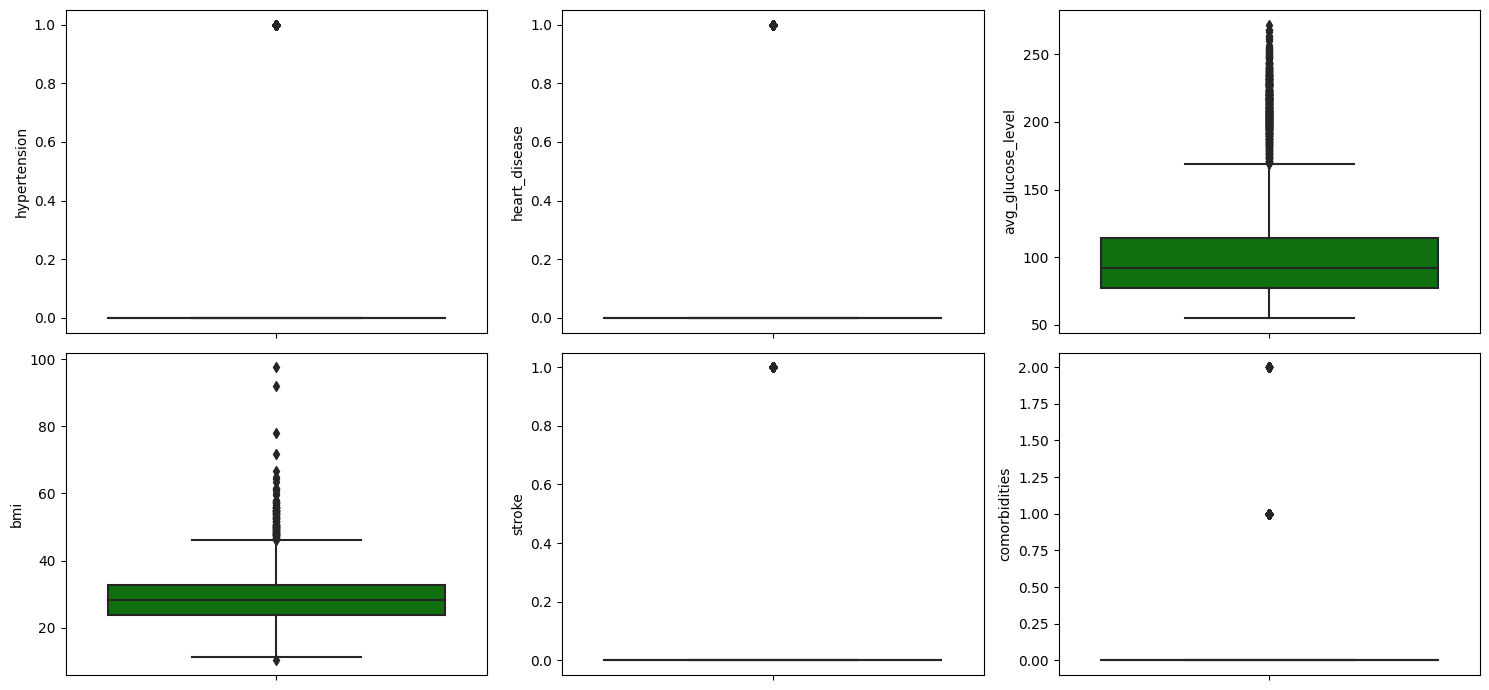

In [140]:
# Borramos outliers
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

In [141]:
outlier = ['avg_glucose_level', 'bmi']

In [142]:
# Calcula el valor del primer cuartil (25%)
Q1 = df[outlier].quantile(0.25)

# Calcula el valor del tercer cuartil (75%)
Q3 = df[outlier].quantile(0.75)

# Calcula la amplitud intercuartílica (IQR)
IQR = Q3 - Q1

# Selecciona solo las filas del dataframe que no tengan valores de la variable "outlier"
# por debajo del límite inferior (Q1 - 1.5*IQR) o por encima del límite superior (Q3 + 1.5*IQR)
# any(axis=1) indica que se deben eliminar las filas que tengan al menos un valor de "outlier"
# dentro de los límites establecidos
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]

# Reinicia el índice del dataframe para que sea consecutivo
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,comorbidities,age_group,activity_level_residence
0,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,70-80,2
1,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,2,70-80,2
2,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,0,60-70,3
3,Female,59,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,0,50-60,2
4,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,0,70-80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1,70-80,3
4387,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0,80-90,3
4388,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,0,30-40,2
4389,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,0,50-60,2


Convertimos columnas categóricas a numéricas

In [143]:
# onehot encoding para categóricas
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,comorbidities,activity_level_residence,gender_Female,gender_Male,...,age_group_0-10,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70-80,age_group_80-90,age_group_90-100
2,80,0,1,105.92,32.500000,1,1,2,0,1,...,0,0,0,0,0,0,0,1,0,0
6,74,1,1,70.09,27.400000,1,2,2,0,1,...,0,0,0,0,0,0,0,1,0,0
7,69,0,0,94.39,22.800000,1,0,3,1,0,...,0,0,0,0,0,0,1,0,0,0
8,59,0,0,76.15,28.893237,1,0,2,1,0,...,0,0,0,0,0,1,0,0,0,0
9,78,0,0,58.57,24.200000,1,0,3,1,0,...,0,0,0,0,0,0,0,1,0,0


Pasos previos

In [144]:
# separamos feature y target
X = df.drop(columns = ['stroke'])
y = df['stroke']

Usamos la técnica SMOTE (Synthetic Minority Over-sampling Technique) para el oversampling

In [145]:
# using SMOTE Techniqe
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(4391, 33)
Shape of X after SMOTE:(8452, 33) 


Target Class distributuion before SMOTE:
0    0.962423
1    0.037577
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


Dividimos datos para el entrenamiento y datos para el testing

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 111)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6761, 33), (6761,), (1691, 33), (1691,))

Normalizamos datos usando StandardScaler

In [147]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Usamos KNN e hyperturning usando GridSearchCV

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best score: 0.9704189025483585
              precision    recall  f1-score      support
No Stroke      0.981436  0.974201  0.977805   814.000000
Stroke         0.976217  0.982896  0.979545   877.000000
accuracy       0.978711  0.978711  0.978711     0.978711
macro avg      0.978827  0.978549  0.978675  1691.000000
weighted avg   0.978729  0.978711  0.978708  1691.000000


<AxesSubplot: >

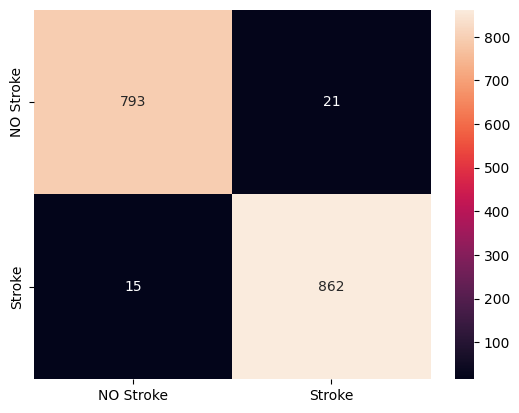

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define una grilla de valores para los hiperparámetros del modelo
param_grid = {'n_neighbors': [3, 5, 7],
              'metric': ['euclidean', 'manhattan']}

# Crea un modelo de KNN
knn = KNeighborsClassifier()

# Crea un objeto GridSearchCV con el modelo de KNN y la grilla de hiperparámetros
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Entrena el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Muestra la mejor combinación de hiperparámetros encontrada
print('Best parameters:', grid_search.best_params_)

# Muestra la mejor puntuación obtenida en validación cruzada
print('Best score:', grid_search.best_score_)

# Utiliza el modelo con los mejores hiperparámetros para hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Muestra las métricas de evaluación del modelo con los mejores hiperparámetros
report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
df_report = pd.DataFrame(report).transpose()
print(df_report)

# Confussion matrix
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt="d", xticklabels=['NO Stroke', 'Stroke'], yticklabels=['NO Stroke', 'Stroke'])


## Conclusiones

Con base en los resultados del modelo KNN con los mejores hiperparámetros encontrados, podemos sacar las siguientes conclusiones:

Mejores hiperparámetros: El modelo KNN obtuvo los mejores resultados utilizando una métrica de distancia 'manhattan' y un número de vecinos igual a 3. Estos parámetros optimizados se eligieron mediante GridSearchCV.

Mejor puntuación en validación cruzada: La mejor puntuación obtenida en la validación cruzada fue de 0.9857. Esto indica que el modelo tiene un buen rendimiento en la clasificación del accidente cerebrovascular en el conjunto de datos equilibrado.

Métricas de evaluación del modelo: El informe de clasificación muestra métricas como precisión, recall y f1-score para las clases 'No Stroke' y 'Stroke'. En general, el modelo tiene un alto rendimiento en la clasificación, con altos valores de precisión (98.1% y 98.6%), recall (97.4% y 98.2%), y f1-score (97.78% y 97.9%) para ambas clases, respectivamente.

Matriz de confusión: La matriz de confusión muestra el número de predicciones correctas e incorrectas del modelo para cada clase. Los valores en la diagonal principal representan las predicciones correctas, mientras que los valores fuera de la diagonal principal representan las predicciones incorrectas. La matriz de confusión muestra un alto número de predicciones correctas para ambas clases 'No Stroke' y 'Stroke'.

En general, podemos concluir que el modelo KNN con los mejores hiperparámetros obtenidos tiene un buen rendimiento en la clasificación de accidentes cerebrovasculares en el conjunto de datos equilibrado, con altos valores de precisión, recall y f1-score para ambas clases. Sin embargo, es importante tener en cuenta que estas conclusiones se basan en los resultados de este modelo específico y en el conjunto de datos utilizado. Es posible que se requiera un análisis adicional y validación en otros conjuntos de datos para obtener conclusiones más generales y sólidas.